# FORECAST

# Previsão utilizando os dois melhores algoritmos do estudo

## Modelo - Ridge Regressor

### Forecast - Brasil

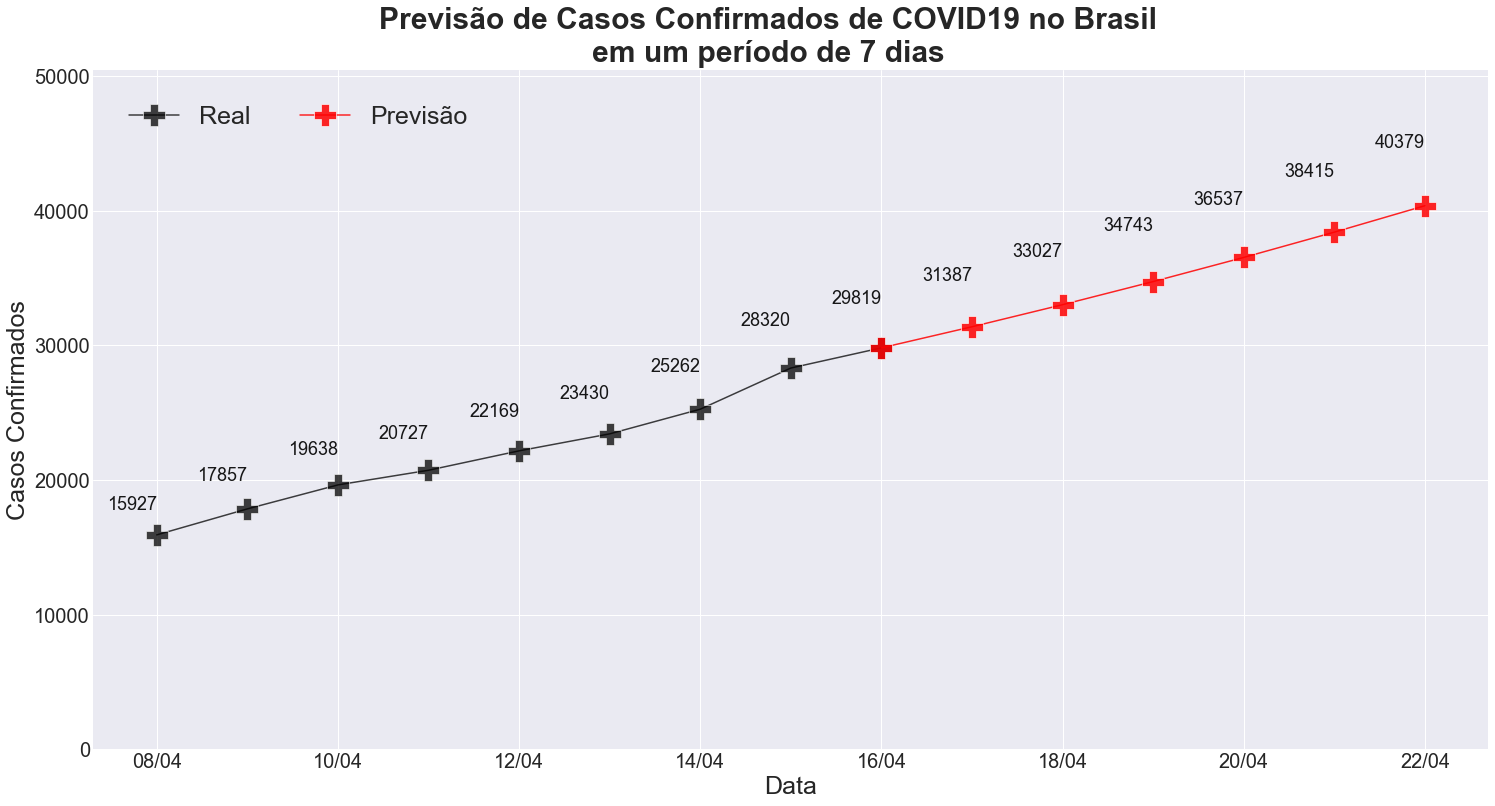

In [137]:
#Soma de casos confirmado no Brasil
br_forecast = allforecast.groupby(['date'])[['cases']].sum().reset_index()

#Definindo o período para mostrar no gráfico
ult_dias = 15
br_forecast = br_forecast[br_forecast['date']>allforecast[allforecast['Day']==allforecast.Day.max()-ult_dias].date.tail(1).values[0]].reset_index(drop=True)

#Configurando o formato da data que desejo mostrar no gráfico
dateview = [br_forecast.date[x].strftime("%d/%m") for x in range(0,len(br_forecast.date))]

fig , ax = plt.subplots(figsize=(25,12.5))
fig.suptitle("Previsão de Casos Confirmados de COVID19 no Brasil\nem um período de {} dias".format(dias),fontsize=30,y=0.95,weight='bold')

sns.set_style("darkgrid")
sns.lineplot(x=br_forecast.date[:-dias+1],y=br_forecast.cases[:-dias+1],color="black",marker='P',markersize=22,label="Real",alpha=0.75)
sns.lineplot(x=br_forecast.date[-dias:],y=br_forecast.cases[-dias:],color="red",marker='P',markersize=22,label="Previsão",alpha=0.85)
ax.set_ylim(0,br_forecast.cases.max()*1.25)
ax.set_xlabel('Data',fontsize=25)
ax.set_ylabel('Casos Confirmados',fontsize=25)
ax.tick_params(axis='x',labelsize=20)
ax.tick_params(axis='y',labelsize=20)
ax.set_xticks(br_forecast.date[::-2])
ax.set_xticklabels(dateview[::-2])
ax.legend(ncol=2,fontsize=25,borderpad=0.925,loc='upper left')
        
#Exibindo valores de todos os dias
for i in range(1,ult_dias+1):
    ax.annotate('{:.0f}'.format(br_forecast.cases.tail(i).values[0]),xy=(br_forecast.date.tail(i).values[0],br_forecast.cases.tail(i).values[0]*1.10),
                size=18,ha='right',va='bottom',color='black',alpha=.9)

plt.show()

### Forecast - Estados

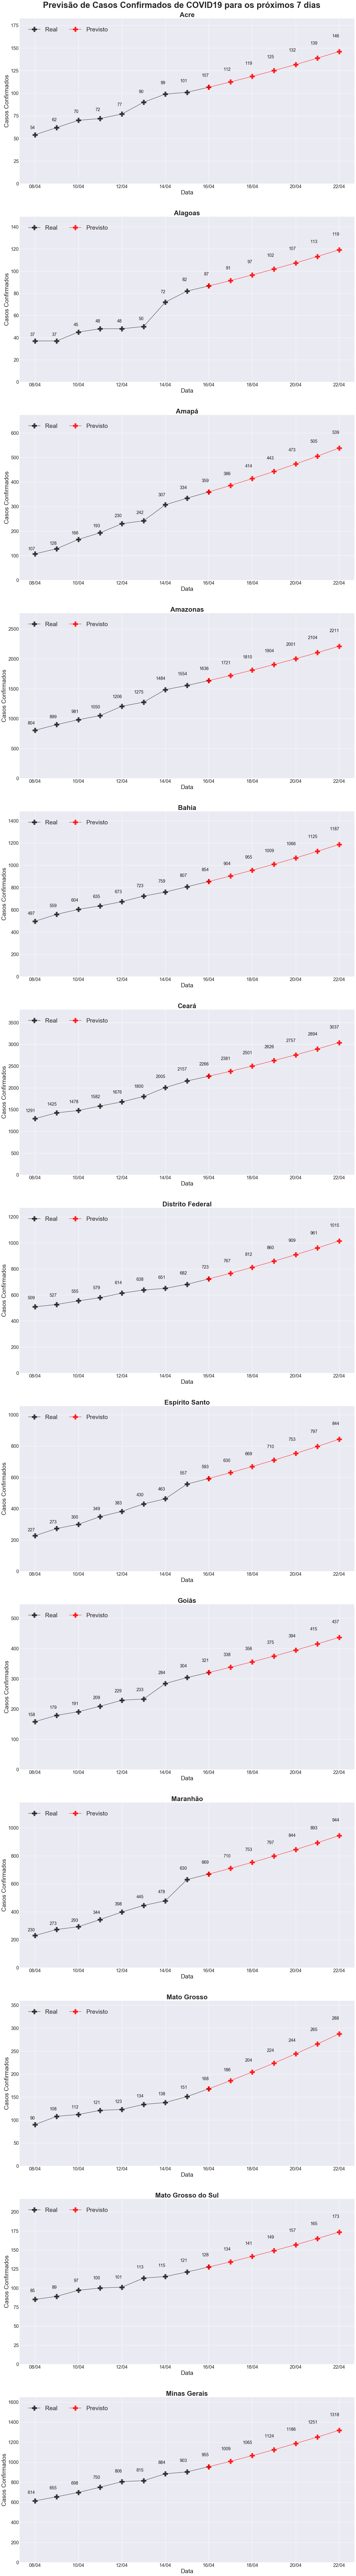

In [138]:
fig , ax = plt.subplots(ncols=1,nrows=13,figsize=(25,195))
fig.suptitle("Previsão de Casos Confirmados de COVID19 para os próximos {} dias".format(dias),fontsize=35,y=0.885,weight='bold')
sns.set_style("darkgrid")

#Selecionando os estados para previsão
estados = ['Acre', 'Alagoas', 'Amapá', 'Amazonas', 'Bahia', 'Ceará','Distrito Federal', 'Espírito Santo', 'Goiás', 'Maranhão', 'Mato Grosso', 'Mato Grosso do Sul', 'Minas Gerais']
           #, 'Paraná','Paraíba', 'Pará', 'Pernambuco', 'Piauí','Rio Grande do Norte','Rio Grande do Sul',
            #'Rio de Janeiro', 'Rondônia', 'Roraima','Santa Catarina', 'Sergipe', 'São Paulo', 'Tocantins']

for est in range(0,len(estados)):
    
    #Definindo o período para mostrar no gráfico
    ult_dias = 15
    fore = allforecast[allforecast['date']>allforecast[allforecast['Day']==allforecast.Day.max()-ult_dias].date.tail(1).values[0]].reset_index(drop=True)
    
    #Selecionando cada estado para forecast
    fore = fore[fore['state']==estados[est]].reset_index(drop=True)

    #Configurando o formato da data que desejo mostrar no gráfico
    dateview = [fore.date[x].strftime("%d/%m") for x in range(0,len(fore.date))]

    sns.lineplot(x=fore.date[:-dias+1],y=fore.cases[:-dias+1],color="black",marker='P',markersize=22,label="Real",alpha=0.75,ax=ax[est])
    sns.lineplot(x=fore.date[-dias:],y=fore.cases[-dias:],color="red",marker='P',markersize=22,label="Previsto",alpha=0.85,ax=ax[est])
    ax[est].set_title("{}".format(estados[est]),fontsize=28,weight='bold')
    ax[est].set_ylim(0,fore.cases.max()*1.25)
    ax[est].set_xlabel('Data',fontsize=25)
    ax[est].set_ylabel('Casos Confirmados',fontsize=25)
    ax[est].tick_params(axis='x',labelsize=20)
    ax[est].tick_params(axis='y',labelsize=20)
    ax[est].set_xticks(fore.date[::-2])
    ax[est].set_xticklabels(dateview[::-2])
    ax[est].legend(ncol=2,fontsize=25,borderpad=0.925,loc='upper left')

    #Exibindo valores de todos os dias
    for i in range(1,ult_dias+1):
        ax[est].annotate('{:.0f}'.format(fore.cases.tail(i).values[0]),xy=(fore.date.tail(i).values[0],fore.cases.tail(i).values[0]*1.10),
                    size=18,ha='right',va='bottom',color='black',alpha=.9)

plt.show()

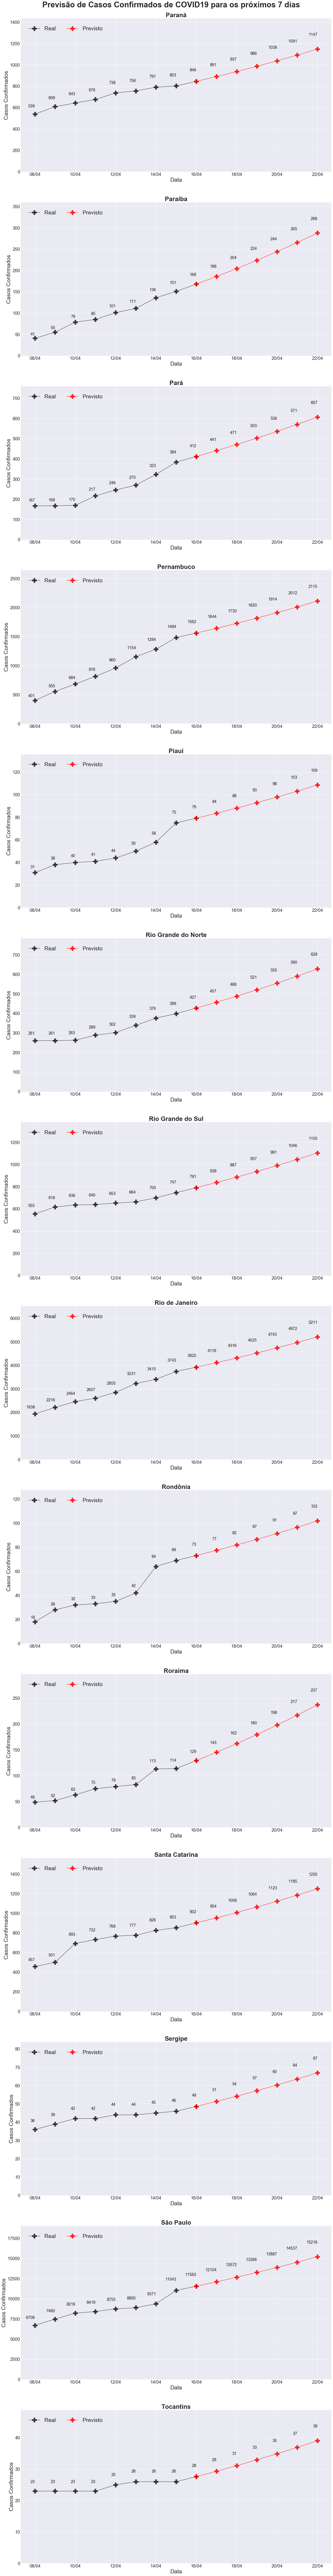

In [139]:
fig , ax = plt.subplots(ncols=1,nrows=14,figsize=(25,210))
fig.suptitle("Previsão de Casos Confirmados de COVID19 para os próximos {} dias".format(dias),fontsize=35,y=0.885,weight='bold')
sns.set_style("darkgrid")

#Selecionando os estados para previsão
estados = ['Paraná','Paraíba', 'Pará', 'Pernambuco', 'Piauí','Rio Grande do Norte','Rio Grande do Sul',
           'Rio de Janeiro','Rondônia','Roraima','Santa Catarina', 'Sergipe', 'São Paulo', 'Tocantins']

for est in range(0,len(estados)):
    
    #Definindo o período para mostrar no gráfico
    ult_dias = 15
    fore = allforecast[allforecast['date']>allforecast[allforecast['Day']==allforecast.Day.max()-ult_dias].date.tail(1).values[0]].reset_index(drop=True)
    
    #Selecionando cada estado para forecast
    fore = fore[fore['state']==estados[est]].reset_index(drop=True)

    #Configurando o formato da data que desejo mostrar no gráfico
    dateview = [fore.date[x].strftime("%d/%m") for x in range(0,len(fore.date))]

    sns.lineplot(x=fore.date[:-dias+1],y=fore.cases[:-dias+1],color="black",marker='P',markersize=22,label="Real",alpha=0.75,ax=ax[est])
    sns.lineplot(x=fore.date[-dias:],y=fore.cases[-dias:],color="red",marker='P',markersize=22,label="Previsto",alpha=0.85,ax=ax[est])
    ax[est].set_title("{}".format(estados[est]),fontsize=28,weight='bold')
    ax[est].set_ylim(0,fore.cases.max()*1.25)
    ax[est].set_xlabel('Data',fontsize=25)
    ax[est].set_ylabel('Casos Confirmados',fontsize=25)
    ax[est].tick_params(axis='x',labelsize=20)
    ax[est].tick_params(axis='y',labelsize=20)
    ax[est].set_xticks(fore.date[::-2])
    ax[est].set_xticklabels(dateview[::-2])
    ax[est].legend(ncol=2,fontsize=25,borderpad=0.925,loc='upper left')

    #Exibindo valores de todos os dias
    for i in range(1,ult_dias+1):
        ax[est].annotate('{:.0f}'.format(fore.cases.tail(i).values[0]),xy=(fore.date.tail(i).values[0],fore.cases.tail(i).values[0]*1.10),
                    size=18,ha='right',va='bottom',color='black',alpha=.9)

plt.show()

### Forecast - Algumas Cidades
### Caso você deseje a previsão para sua cidade, entre em contato comigo para eu poder adicionar na publicação.

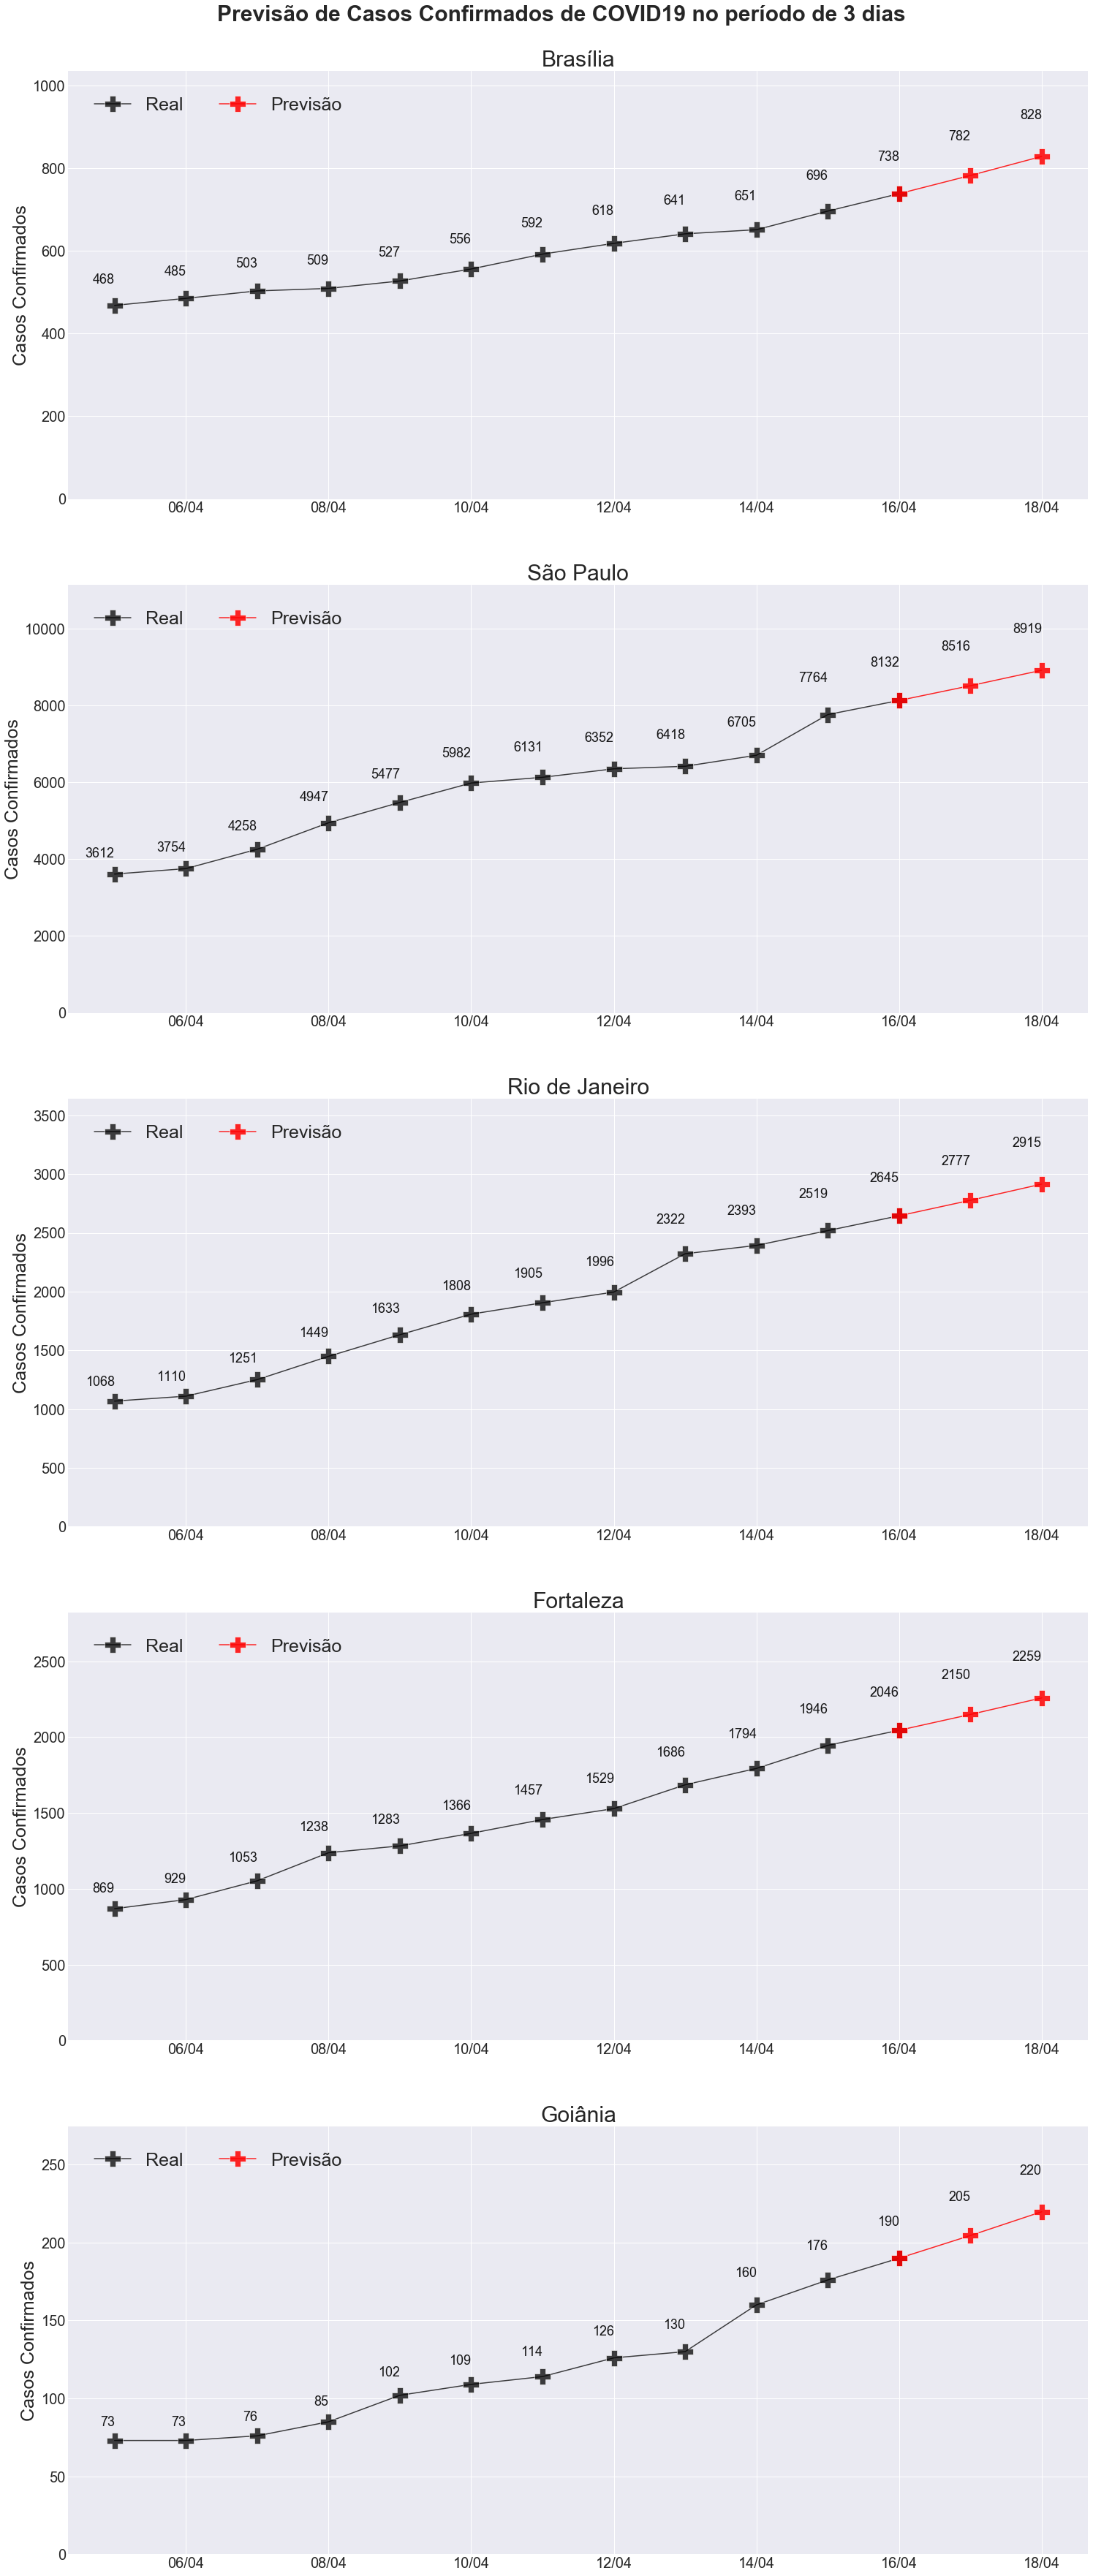

In [162]:
#Criando script básico, porém útil para projetar o número de casos das cidades definidos para os próximas x dias

#Definindo as cidades
cities = ['Brasília','São Paulo','Rio de Janeiro','Fortaleza','Goiânia']
#Definindo o número de dias para forecast
dias = 3

fig , ax = plt.subplots(ncols=1,nrows=len(cities),figsize=(25,12.5*len(cities)))
fig.suptitle("Previsão de Casos Confirmados de COVID19 no período de {} dias".format(dias),fontsize=30,y=0.90,weight='bold')
sns.set_style('darkgrid')
cont=0

for city in range(0,len(cities)):

    proj = date_city[date_city['city']==cities[city]].reset_index(drop=True)
    proj1 = proj.copy()
    
    for i in range(0,dias):

        p = model.predict([[proj1.cases.tail(1).values[0],
                               proj1.UF_CAT_TO.head(1).values[0],
                               proj1.UF_CAT_AL.head(1).values[0],
                               proj1.UF_CAT_SE.head(1).values[0],
                               proj1.UF_CAT_RO.head(1).values[0],
                               proj1.UF_CAT_MS.head(1).values[0],
                               proj1.UF_CAT_AC.head(1).values[0],
                               proj1.REG_CAT_Sul.head(1).values[0],
                               proj1.UF_CAT_PI.head(1).values[0],
                               proj1.UF_CAT_GO.head(1).values[0]]])[0]

        att = pd.DataFrame({'cases':p,'date':pd.date_range(date_city.date.max(),periods=i+2).tolist()[-1]
                            ,'Day':proj1.Day.max()+1,'city':cities[city]},index=[0])
        proj1 = pd.concat([proj1,att]).reset_index(drop=True)


    #Definindo o período para mostrar no gráfico
    ult_dias = 14
    proj1 = proj1[proj1['date']>proj1[proj1['Day']==proj1.Day.max()-ult_dias].date.tail(1).values[0]].reset_index(drop=True)

    #Configurando o formato da data que desejo mostrar no gráfico
    dateview = [proj1.date[x].strftime("%d/%m") for x in range(0,len(proj1.date))]
    dateview

    sns.set_style("darkgrid")
    sns.lineplot(x=proj1.date[:-dias+1],y=proj1.cases[:-dias+1],color="black",marker='P',markersize=22,label="Real",alpha=0.75,ax=ax[cont])
    sns.lineplot(x=proj1.date[-dias:],y=proj1.cases[-dias:],color="red",marker='P',markersize=22,label="Previsão",alpha=0.85,ax=ax[cont])
    ax[cont].set_ylim(0,proj1.cases.max()*1.25)
    ax[cont].set_title('{}'.format(cities[city]),fontsize=30)
    ax[cont].set_xlabel('',fontsize=25)
    ax[cont].set_ylabel('Casos Confirmados',fontsize=25)
    ax[cont].tick_params(axis='x',labelsize=20)
    ax[cont].tick_params(axis='y',labelsize=20)
    ax[cont].set_xticks(proj1.date[::-2])
    ax[cont].set_xticklabels(dateview[::-2])
    ax[cont].legend(ncol=2,fontsize=25,borderpad=0.925,loc='upper left')

    for i in range(1,ult_dias+1):
        ax[cont].annotate('{:.0f}'.format(proj1.cases.tail(i).values[0]),xy=(proj1.date.tail(i).values[0],proj1.cases.tail(i).values[0]*1.10),
                    size=18,ha='right',va='bottom',color='black',alpha=.9)
        
    cont = cont+1
    
plt.show()

# 

## Modelo Secundário - Linear Regression

### Forecast - Brasil

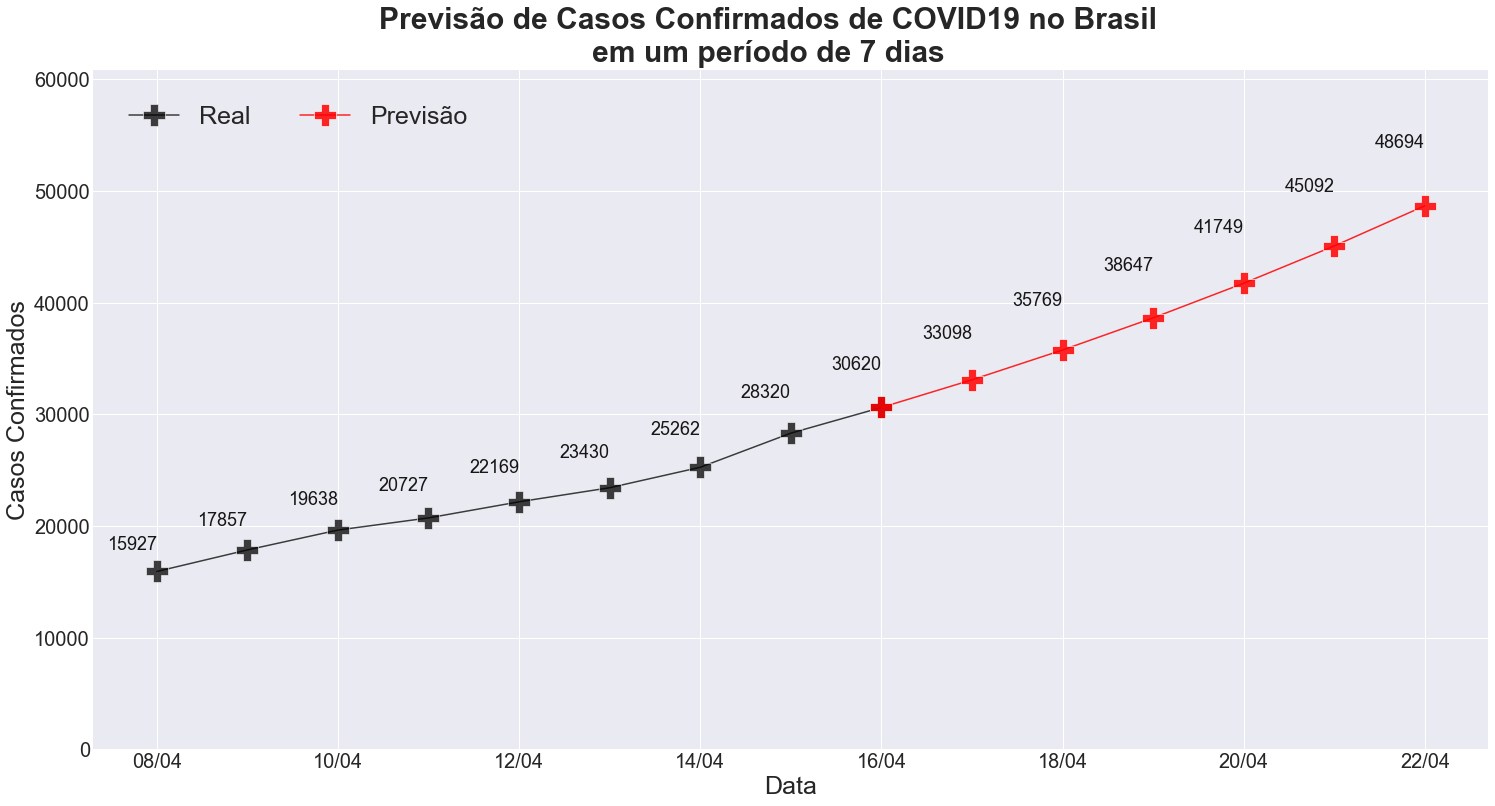

In [143]:
#Soma de casos confirmado no Brasil
br_forecast = allforecast.groupby(['date'])[['cases']].sum().reset_index()

#Definindo o período para mostrar no gráfico
ult_dias = 15
br_forecast = br_forecast[br_forecast['date']>allforecast[allforecast['Day']==allforecast.Day.max()-ult_dias].date.tail(1).values[0]].reset_index(drop=True)

#Configurando o formato da data que desejo mostrar no gráfico
dateview = [br_forecast.date[x].strftime("%d/%m") for x in range(0,len(br_forecast.date))]

fig , ax = plt.subplots(figsize=(25,12.5))
fig.suptitle("Previsão de Casos Confirmados de COVID19 no Brasil\nem um período de {} dias".format(dias),fontsize=30,y=0.95,weight='bold')

sns.set_style("darkgrid")
sns.lineplot(x=br_forecast.date[:-dias+1],y=br_forecast.cases[:-dias+1],color="black",marker='P',markersize=22,label="Real",alpha=0.75)
sns.lineplot(x=br_forecast.date[-dias:],y=br_forecast.cases[-dias:],color="red",marker='P',markersize=22,label="Previsão",alpha=0.85)
ax.set_ylim(0,br_forecast.cases.max()*1.25)
ax.set_xlabel('Data',fontsize=25)
ax.set_ylabel('Casos Confirmados',fontsize=25)
ax.tick_params(axis='x',labelsize=20)
ax.tick_params(axis='y',labelsize=20)
ax.set_xticks(br_forecast.date[::-2])
ax.set_xticklabels(dateview[::-2])
ax.legend(ncol=2,fontsize=25,borderpad=0.925,loc='upper left')
        
#Exibindo valores de todos os dias
for i in range(1,ult_dias+1):
    ax.annotate('{:.0f}'.format(br_forecast.cases.tail(i).values[0]),xy=(br_forecast.date.tail(i).values[0],br_forecast.cases.tail(i).values[0]*1.10),
                size=18,ha='right',va='bottom',color='black',alpha=.9)

plt.show()

# 

# Considerações Finais do Projeto

## Utilidade do projeto :
### - As previsões podem ajudar na tomada de decisão dos orgãos da saúde em busca de uma quantidade x de leitos e testes para o COVID19, adequação das medidas de isolamento social por região e entre outras demandas que surgirem com a pandemia. Especificando essas previsões também para os municípios essas medidas se tornariam ainda mais efetivas.
### - O script pode ser usado sem dificuldades para o usuário que desejar continuar com o projeto, atualizando os dados, fazendo modificações e melhorando os resultados.
### - O código pode ser facilmente modificado para prever também o número de mortes.
### - Muitos conceitos e visualizações podem ser utilizados como referência para outros problemas de Time Series e Machine Learning.

## 

## Upgrades que podem ser feitos com mais tempo :

## Melhorar a Precisão da Previsão
### - Adicionar novas variáveis significativas.
### - Testar outros algoritmos e modelos.
### - Mudar a target para a quantidade de novos casos em vez da soma acumulada de casos.

## Melhorar o Projeto
### - Explorar ainda mais a base de dados com informações dos municípios modelando e realizando previsões formais para eles.

## Melhorar o Produto Final
### - Entregar as visualizações das previsões dos próximos x dias em um site, onde os usuários possam interagir.